<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/03_classification/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'1.0.2'

Sigmoid

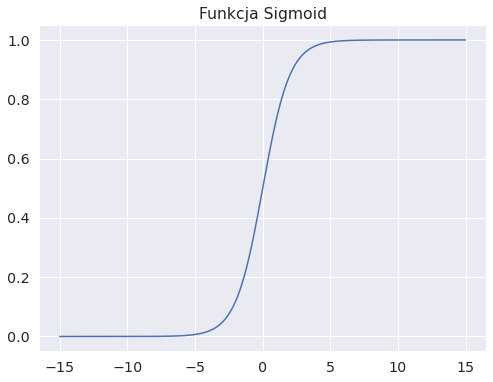

In [8]:
x = np.arange(-15, 15, 0.01)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.title('Funkcja Sigmoid')
plt.plot(x, y)

#Regresja logistyczna

In [11]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
X = data['data']
y = data['target']

In [32]:
all_data = np.c_[X, y]

df_raw = pd.DataFrame(all_data, columns=list(data['feature_names']) + ['target'])
df = df_raw.copy()
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)


Standaryzowanie zmiennych

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
scaler.mean_

array([-0.00, -0.00, -0.00, -0.00, -0.00, 0.00, 0.00, 0.00, -0.00, -0.00, 0.00, -0.00, 0.00, 0.00, -0.00, -0.00, 0.00, 0.00, -0.00, 0.00, 0.00, -0.00, -0.00, -0.00, 0.00, -0.00, -0.00, 0.00, 0.00, -0.00])

In [41]:
scaler.scale_

array([1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00])

Model

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = lr.predict(X_test) #zwraca 0 i 1
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [47]:
y_pred_proba = lr.predict_proba(X_test) #zwraca p-stwo
y_pred_proba

array([[0.07, 0.93],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.95, 0.05],
       [0.21, 0.79],
       [0.00, 1.00],
       [0.03, 0.97],
       [0.98, 0.02],
       [0.00, 1.00],
       [0.72, 0.28],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.04, 0.96],
       [0.01, 0.99],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.91, 0.09],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.03, 0.97],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.02, 0.98],
       [0.04, 0.96],
       [0.00, 1.00],
       [0.00,

Ocena modelu

Accuracy: 0.9824561403508771


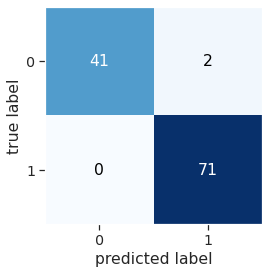

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [49]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

